In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')

In [8]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [9]:
# Check for missing values
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [10]:
categorical = ['lead_source', 'industry','employment_status', 'location']

numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count','lead_score']

In [11]:
# Replace nulls in categorical features with 'NA'
df[categorical] = df[categorical].fillna('NA')

# Replace nulls in numerical features with 0.0
df[numerical] = df[numerical].fillna(0.0)

print(df[categorical].isnull().sum())
print(df[numerical].isnull().sum())

lead_source          0
industry             0
employment_status    0
location             0
dtype: int64
number_of_courses_viewed    0
annual_income               0
interaction_count           0
lead_score                  0
dtype: int64


In [12]:
#Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use the train_test_split function for that with random_state=1
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

print(len(df_train_full))
print(len(df_test))
print(len(df_val))
print(len(df_train))


1169
293
293
876


In [13]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [14]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

In [17]:
# Question 1: ROC AUC feature importance

from sklearn.metrics import roc_auc_score

numerical = [
    'lead_score',
    'number_of_courses_viewed',
    'interaction_count',
    'annual_income'
]

# ground truth from training set
y = y_train  

for col in numerical:
    scores = df_train[col].values
    
    auc = roc_auc_score(y, scores)

    # if negatively correlated, flip sign
    if auc < 0.5:
        auc = roc_auc_score(y, -scores)

    print(f"{col}: AUC = {auc:.3f}")



lead_score: AUC = 0.614
number_of_courses_viewed: AUC = 0.764
interaction_count: AUC = 0.738
annual_income: AUC = 0.552


In [95]:
# The highest AUC is number_of_courses_viewed

In [112]:

# One-hot encoding
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(df_train.to_dict(orient='records'))
X_val = dv.transform(df_val.to_dict(orient='records'))

# Target
y_train = df_train.converted.values
y_val = df_val.converted.values

# Train logistic regression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

# Predict on validation
y_pred = model.predict_proba(X_val)[:, 1]

auc = roc_auc_score(y_val, y_pred)
print("Validation AUC: %.3f" % auc)



In [113]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [18]:
# One-hot encoding
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(df_train.to_dict(orient='records'))
X_val = dv.transform(df_val.to_dict(orient='records'))

y_train 
y_val 

# Train logistic regression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

# Predict on validation
y_pred = model.predict_proba(X_val)[:, 1]

auc = roc_auc_score(y_val, y_pred)
print("Validation AUC: %.3f" % auc)



Validation AUC: 0.817


In [ ]:
# AUC 0.92

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


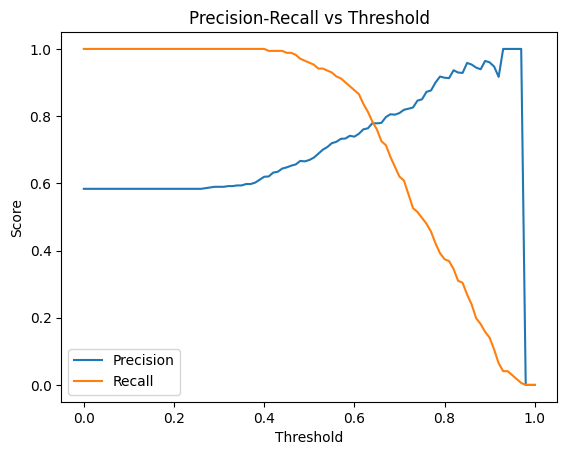

Intersection threshold: 0.980


In [22]:
#Question 3: Precision and Recall
from sklearn.metrics import precision_score, recall_score

# Predict probabilities on validation set
y_pred = model.predict_proba(X_val)[:, 1]

# thresholds with step = 0.01
thresholds = np.linspace(0, 1, 101)

precisions = []
recalls = []

for t in thresholds:
    y_pred_bin = (y_pred >= t).astype(int)
    precisions.append(precision_score(y_val, y_pred_bin))
    recalls.append(recall_score(y_val, y_pred_bin))

# Plot curves
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.show()

# Find intersection threshold
diff = np.abs(np.array(precisions) - np.array(recalls))
best_idx = diff.argmin()
print("Intersection threshold: %.3f" % thresholds[best_idx])



In [23]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [24]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[ 41,  81],
       [  7, 164]])

In [25]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.14, 0.28],
       [0.02, 0.56]])

In [20]:
# Precision and Recall

In [26]:
#Precison
p = tp / (tp + fp)
p

np.float64(0.6693877551020408)

In [27]:
#Recall
r = tp / (tp + fn)
r

np.float64(0.9590643274853801)

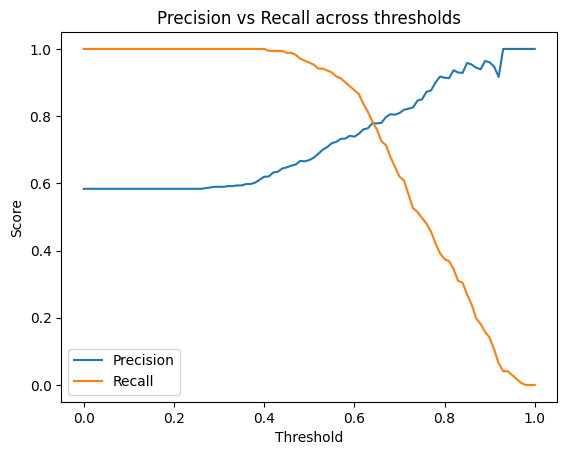

Intersection threshold: 0.640


In [28]:
# thresholds from 0.0 to 1.0 with step = 0.01
thresholds = np.linspace(0, 1, 101)
precisions = []
recalls = []

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

for t in thresholds:
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    # precision
    if (tp + fp) > 0:
        p = tp / (tp + fp)
    else:
        p = 1.0  # no positive predictions → define precision = 1
    
    # recall
    if (tp + fn) > 0:
        r = tp / (tp + fn)
    else:
        r = 0.0
    
    precisions.append(p)
    recalls.append(r)

# Plot curves
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall across thresholds")
plt.legend()
plt.show()

# Find intersection threshold
diff = np.abs(np.array(precisions) - np.array(recalls))
best_idx = diff.argmin()
print("Intersection threshold: %.3f" % thresholds[best_idx])


In [25]:
# Intersection threshold
0.545

Counter({np.False_: 293})

np.float64(0.41638225255972694)

In [30]:
thresholds = np.linspace(0, 1, 101)
precisions = []
recalls = []
f1_scores = []

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

for t in thresholds:
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    # precision
    if (tp + fp) > 0:
        p = tp / (tp + fp)
    else:
        p = 1.0
    
    # recall
    if (tp + fn) > 0:
        r = tp / (tp + fn)
    else:
        r = 0.0
    
    # f1
    if (p + r) > 0:
        f1 = 2 * p * r / (p + r)
    else:
        f1 = 0.0
    
    precisions.append(p)
    recalls.append(r)
    f1_scores.append(f1)

# Find threshold with max F1
best_idx = np.argmax(f1_scores)
print("Best threshold for F1: %.3f" % thresholds[best_idx])
print("Max F1 score: %.3f" % f1_scores[best_idx])


Best threshold for F1: 0.570
Max F1 score: 0.812


In [27]:
# f1 is maximal at 0.54 threshold

In [31]:
# 5-fold CV

from sklearn.model_selection import KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


kfold = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]

    y_train = df_train.converted.values
    y_val = df_val.converted.values

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(df_train.to_dict(orient='records'))
    X_val = dv.transform(df_val.to_dict(orient='records'))

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print("Scores:", scores)
print("Mean AUC: %.3f" % np.mean(scores))
print("Std AUC: %.4f" % np.std(scores))


Scores: [0.8688304920717635, 0.9216514191883649, 0.8433810305731487, 0.8422322540473225, 0.9026466491255224]
Mean AUC: 0.876
Std AUC: 0.0318


In [32]:
#Hyperparameter Tuning

Cs = [0.000001, 0.001, 1]
from sklearn.model_selection import KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in Cs:
    scores = []
    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv = DictVectorizer(sparse=False)
        X_train = dv.fit_transform(df_train.to_dict(orient='records'))
        X_val = dv.transform(df_val.to_dict(orient='records'))

        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train, y_train)

        y_pred = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print(f"C={C}  Mean AUC={np.mean(scores):.3f}  Std={np.std(scores):.3f}")


C=1e-06  Mean AUC=0.561  Std=0.024
C=0.001  Mean AUC=0.926  Std=0.018
C=1  Mean AUC=0.876  Std=0.032


In [ ]:
#Which C leads to the best mean score?
C=1